# Advertising Sales Channel Prediction

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The company has to select proper sales channel to predict the right sales channel to generate good revenue. 

In [1]:
import pandas as pd
Advertising=pd.read_csv("Advertising.csv",sep=",") #reading Advertising.csv file
Advertising.head() #Looking into top 5 rows

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
Advertising.shape #Checking the shape of our data

(200, 5)

In [3]:
Advertising.dtypes #Checking the datatype of each attribute

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [4]:
#Chnaging the name of Unnamed:0 column to ID
Advertising.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [5]:
#Making ID as an Index
Advertising.set_index('id', inplace=True)

In [6]:
Advertising.shape #Checking the shape of our data

(200, 4)

In [7]:
Advertising.head() #Looking into top 5 rows

,TV,radio,newspaper,sales
id,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


As per problem statement Target variable i.e. sales is float64 i.e. continuous value so we'll use Regression to learn our model.

# EDA

## Univariate Analysis

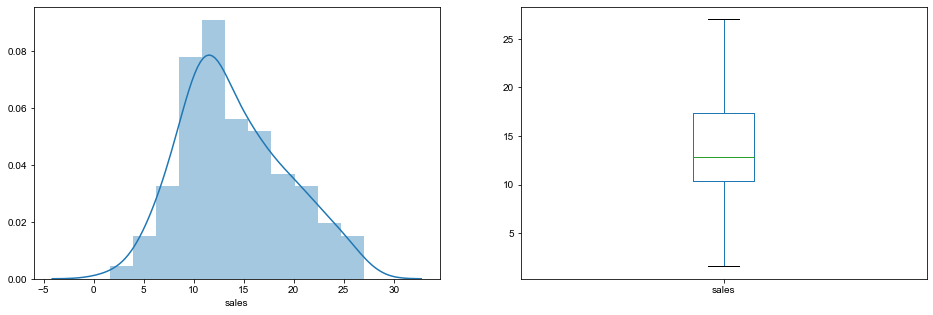

<Figure size 1440x504 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplot(121)
sns.distplot(Advertising['sales'])
plt.subplot(122)
Advertising['sales'].plot.box(figsize=(16,5))
sns.set_style("whitegrid")
plt.figure(figsize = (20,7))
plt.show()

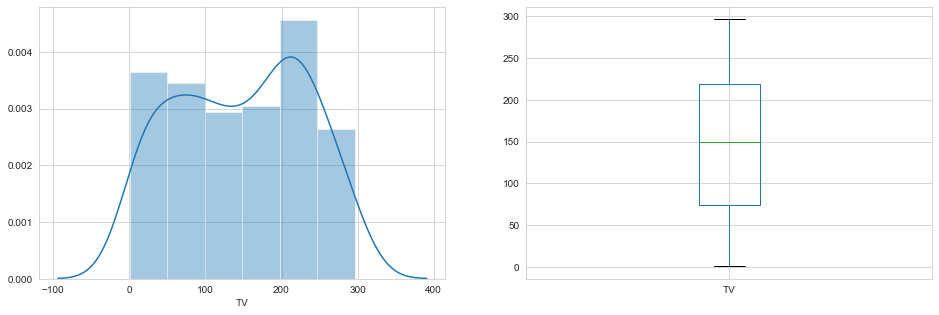

<Figure size 1440x504 with 0 Axes>

In [9]:
plt.subplot(121)
sns.distplot(Advertising['TV'])
plt.subplot(122)
Advertising['TV'].plot.box(figsize=(16,5))
sns.set_style("whitegrid")
plt.figure(figsize = (20,7))
plt.show()

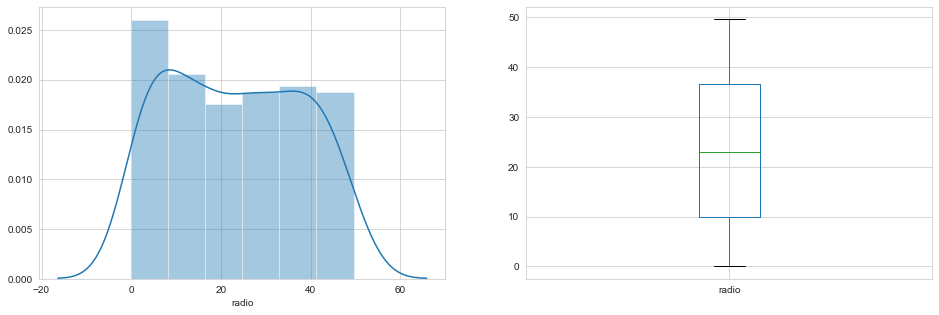

<Figure size 1440x504 with 0 Axes>

In [10]:
plt.subplot(121)
sns.distplot(Advertising['radio'])
plt.subplot(122)
Advertising['radio'].plot.box(figsize=(16,5))
sns.set_style("whitegrid")
plt.figure(figsize = (20,7))
plt.show()

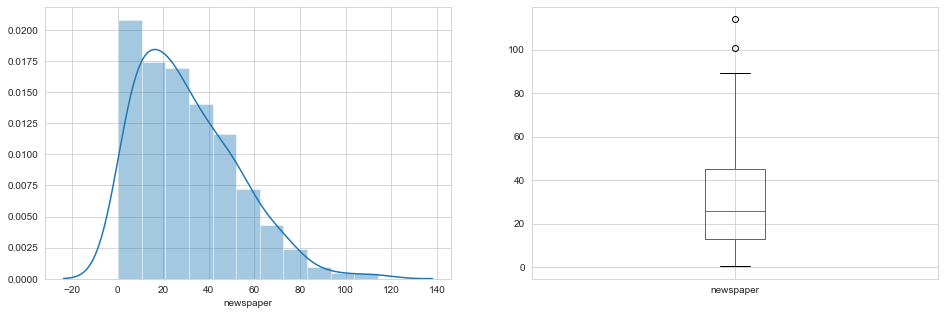

<Figure size 1440x504 with 0 Axes>

In [11]:
plt.subplot(121)
sns.distplot(Advertising['newspaper'])
plt.subplot(122)
Advertising['newspaper'].plot.box(figsize=(16,5))
sns.set_style("whitegrid")
plt.figure(figsize = (20,7))
plt.show()

## Bi-variate Analysis

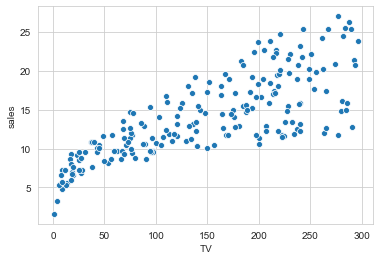

In [12]:
sns.scatterplot(x = 'TV', y = 'sales', data = Advertising)

Number of TV we'll sale more, Sales will Increase.

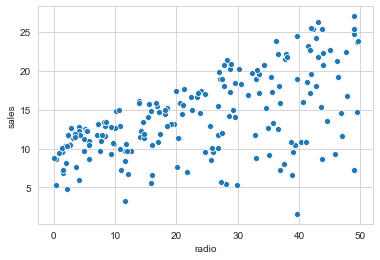

In [13]:
sns.scatterplot(x = 'radio', y = 'sales', data = Advertising)

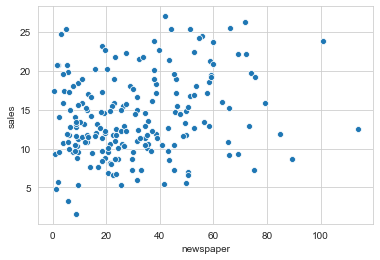

In [14]:
sns.scatterplot(x = 'newspaper', y = 'sales', data = Advertising)

## Multi-Variate Analysis

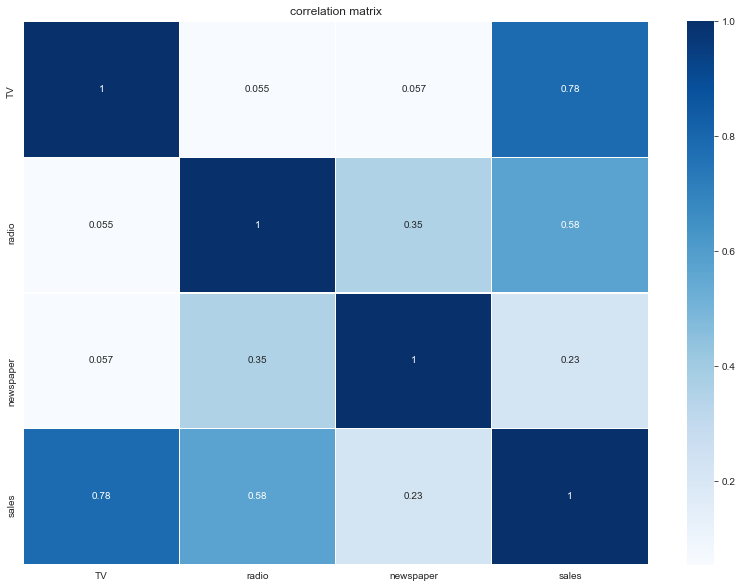

In [15]:
fig=plt.figure(figsize=(14,10))
hc=Advertising.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues",linewidths=.1, annot_kws={"size": 10})
plt.title("correlation matrix")
plt.show()

Tv and radio are heighly corelated with sales

# DATA CLEANING

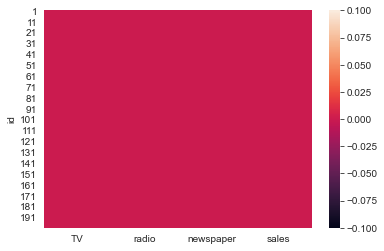

In [16]:
import seaborn as sns
sns.heatmap(Advertising.isnull()) #Looking for null values if any, in heatmap

No null values

# Removing Outliers and Skewness

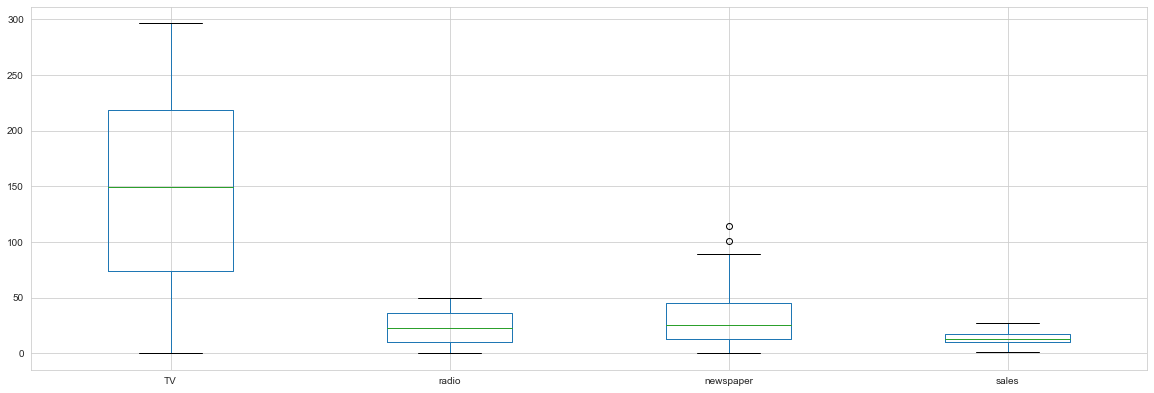

In [17]:
#Checking the outliers again
import matplotlib.pyplot as plt
import seaborn as sns
Advertising.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

No outliers

In [18]:
Advertising.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Skewness of Newspaper is a bit high need to fix it.

In [19]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
Advertising['newspaper'] = np.sqrt(Advertising['newspaper'])

In [20]:
Advertising.skew()

TV          -0.069853
radio        0.094175
newspaper    0.062388
sales        0.407571
dtype: float64

# Seperating Input and Output Variables

In [21]:
x=Advertising.iloc[:,:-1]
y=Advertising.iloc[:,-1:]

In [22]:
x.shape

(200, 3)

In [23]:
y.shape

(200, 1)

In [24]:
import numpy as np
y=np.ravel(y)

In [25]:
y.shape

(200,)

# Finding Best Random State

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.9398730445155545  on Random_state  154


# Train Test Split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Finding Best Algorithm

In [28]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [29]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]

In [30]:
for m in model:
    print("*******************************************************************************")
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print('accuracy score of ->', m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred)))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())
    print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,pred)-score.mean())
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("*******************************************************************************")

*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> LinearRegression()
R2 Score:                 0.9398730445155545
Mean Absolute Error:      1.0805921424497604
Mean Squared error:       1.8781755202890555
Root Mean Squared Error:  1.3704654392902638
[0.87809171 0.91744186 0.92982697 0.81591747 0.89538764]
0.8873331295445761
Difference between R2 score and cross validatio score is -  0.05253991497097843
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
*******************************************************************************
*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.9855596702574837
Mean Absolute Error:      0.5154000000000002
Mean Squa

Random Forest Regressor have height Accuracy and Cross validation score i.e. 98.5%

# Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor()
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']
}

clf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5)
clf.fit(x_train,y_train)
clf.best_params_  #Best parameters

In [ ]:
clf_pred=clf.best_estimator_.predict(x_test)

In [ ]:
r2_score(y_test, clf_pred)

# Saving the model

In [ ]:
import joblib
joblib.dump(clf.best_estimator_,"PJ6_Advertising.obj")
RF_from_joblib=joblib.load('PJ6_Advertising.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predicted), max(y_test))
p2 = min(min(Predicted), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Sales', fontsize=15)
plt.ylabel('Predicted Sales', fontsize=15)
plt.axis('equal')
plt.show()